In [42]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pickle
import copy

In [90]:
with open('/epyc/users/kyboone/sncosmo/test/snia_nocolor_ddf.pkl', 'rb') as file:
    data = pickle.load(file)

In [91]:
data[0]

time,band,flux,fluxerr,zp,zpsys
float64,str5,float64,float64,float64,str2
61030.15846064815,lssti,0.027656985933859308,0.47831831517208273,25.0,ab
61033.11341435186,lssti,-0.6192027954559921,0.3632758341586213,25.0,ab
61034.09471064814,lsstr,0.0330791677242151,0.07694931203390395,25.0,ab
61034.10232638889,lsstg,0.03480810645791743,0.06824203025199438,25.0,ab
61034.10994212964,lssti,0.07554419211682703,0.11495520159707803,25.0,ab
61034.120891203704,lsstz,0.1341406247131887,0.1848978472663113,25.0,ab
61034.131840277776,lssty,-1.4236078398399168,0.5707311144265754,25.0,ab
61037.085717592585,lsstr,-0.1060170246026227,0.10540903254976008,25.0,ab
61037.093333333345,lsstg,-0.1506301662824781,0.12718758988278908,25.0,ab


In [92]:
data[0].meta

{'z': 0.831664461409866,
 't0': 61327.71130920413,
 'x0': 2.706368673087301e-06,
 'x1': -0.40386379902456426,
 'c': 0.0}

In [93]:
x0s = np.array([obj.meta['x0'] for obj in data])

In [101]:
np.array(data)

KeyboardInterrupt: 

In [102]:
idx = x0s.argsort()[::-1]
data = np.array(data)[idx]

In [103]:
N = 1000
newdata = copy.deepcopy(data[:N])
for obj in newdata:
    obj['time'] -= obj.meta['t0']
    obj['time'] /= (1 + obj.meta['z'])
    
    x1 = obj.meta['x1']
    stretch = 0.98 + 0.091*x1 + 0.003*x1**2 - 0.00075*x1**3
    obj['time'] /= stretch
    
    obj['flux'] /= obj.meta['x0']
    obj['fluxerr'] /= obj.meta['x0']

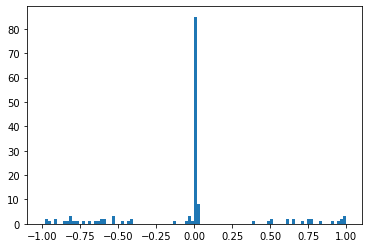

In [104]:
obj = newdata[0]
plt.hist(obj['fluxerr']/obj['flux'], bins=100, range=(-1,1));

In [105]:
data[0]

time,band,flux,fluxerr,zp,zpsys
float64,str5,float64,float64,float64,str2
62873.05210648148,lssty,5.518490281217912,3.348483724957353,25.0,ab
63053.438159722224,lsstz,-1.524609639109269,1.5742748447526245,25.0,ab
63057.40791666666,lssty,0.6088860228648991,3.097770471911112,25.0,ab
63062.42195601851,lsstu,-0.01703852594898403,0.20614681601139617,25.0,ab
63063.362048611125,lsstu,0.11597850472336027,0.31971819333391566,25.0,ab
63077.41616898148,lssti,-0.10712516644440069,0.5800007576127264,25.0,ab
63079.31765046297,lssty,1.9721028449595503,4.864201133535502,25.0,ab
63080.4287962963,lsstz,-0.6914325761483401,1.4277796110525949,25.0,ab
63084.33461805555,lsstz,0.7762163359319494,1.2837920453397162,25.0,ab


In [106]:
newdata[0]

time,band,flux,fluxerr,zp,zpsys
float64,str5,float64,float64,float64,str2
-312.6465312408877,lssty,4829.321457007496,2930.313088783418,25.0,ab
-124.47264174976284,lsstz,-1334.2109288060385,1377.6737657519457,25.0,ab
-120.33149784673236,lssty,532.8461563303605,2710.909804408122,25.0,ab
-115.10098656303003,lsstu,-14.910693825313338,180.40246355890974,25.0,ab
-114.12030720087132,lsstu,101.49469381480135,279.7906406609435,25.0,ab
-99.45942601879615,lssti,-93.74699211779134,507.5681864210097,25.0,ab
-97.47585156978218,lssty,1725.8195809464735,4256.742280643983,25.0,ab
-96.31673405768163,lsstz,-605.0840004977248,1249.473381334354,25.0,ab
-92.24228562392742,lsstz,679.2796608076293,1123.4674983474551,25.0,ab


1000


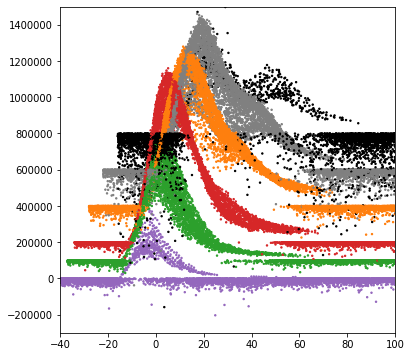

In [127]:
fig = plt.figure(figsize=(6,6))

color_dict = {'lsstu':'C4', 'lsstg':'C2', 'lsstr':'C3', 'lssti':'C1', 'lsstz':'gray', 'lssty':'k'}
offset_dict = {'lsstu':0, 'lsstg':1, 'lsstr':2, 'lssti':4, 'lsstz':6, 'lssty':8}
xmin = -40
xmax = 100

I = 0
for obj in newdata:
    
    if obj.meta['z'] > 1:
        continue
    I += 1
    idx = np.where( (obj['fluxerr']/obj['flux'] <= 0.05) & 
                    (obj['time'] > xmin) & (obj['time'] < xmax) )[0]
    if len(idx) == 0:
        continue
    colors = np.vectorize(color_dict.get)(obj[idx]['band'])
    offsets = np.vectorize(offset_dict.get)(obj[idx]['band'])
    plt.scatter(obj[idx]['time']+offsets*3, obj[idx]['flux']+offsets*1e5, c=colors, s=2)
    
plt.xlim(xmin, xmax+25)
plt.ylim(-3e5, 1.5e6)
print(I)

In [151]:
a = np.array([])
b = np.array([4,5,6,7])
print(a.shape, b.shape)
np.concatenate((a,np.array(obj[idx]['time']).flatten()))

(0,) (4,)


array([-22.50810421, -21.52904216, -20.49030007, -19.44921567,
       -18.40936279, -17.36907526, -16.32917409,   8.69051605,
         9.68405168,  10.72432656,  13.8738402 ,  14.8992287 ,
        15.94397146,  39.9420493 ,  40.97811102,  42.03071379,
        43.06521799,  44.11718085,  45.16129577,  46.20547105])

In [166]:
lc_dict = {'lsstu': [[],[]],
           'lsstg': [[],[]],
           'lsstr': [[],[]],
           'lssti': [[],[]],
           'lsstz': [[],[]],
           'lssty': [[],[]]}

for obj in newdata:
    for band in lc_dict.keys():
            idx = np.where( (obj['fluxerr']/obj['flux'] <= 0.05) & 
                    (obj['time'] > xmin) & (obj['time'] < xmax) &
                          (obj['band'] == band) )[0]
            if len(idx) > 0:
                for i in obj[idx]['time']:
                    lc_dict[band][0].append(i)
                for i in obj[idx]['flux']:
                    lc_dict[band][1].append(i)

(-300000.0, 1500000.0)

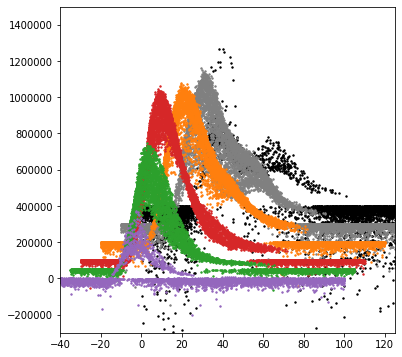

In [183]:
fig = plt.figure(figsize=(6,6))

for band in list(lc_dict.keys())[::-1]:
    offset = offset_dict[band]
    plt.scatter(np.array(lc_dict[band][0])+5*offset, 
                np.array(lc_dict[band][1])+0.5e5*offset, 
                c=color_dict[band], s=2)
    
plt.xlim(xmin, xmax+25)
plt.ylim(-3e5, 1.5e6)

In [184]:
zs = np.array([obj.meta['z'] for obj in newdata])

(array([  5.,   9.,   8.,  12.,  26.,  25.,  30.,  35.,  41.,  57.,  63.,
         79.,  85.,  86., 117., 117., 111.,  61.,  28.,   5.]),
 array([0.05327351, 0.07548638, 0.09769924, 0.11991211, 0.14212498,
        0.16433784, 0.18655071, 0.20876358, 0.23097645, 0.25318931,
        0.27540218, 0.29761505, 0.31982791, 0.34204078, 0.36425365,
        0.38646652, 0.40867938, 0.43089225, 0.45310512, 0.47531798,
        0.49753085]),
 <a list of 20 Patch objects>)

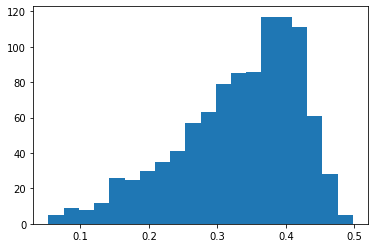

In [186]:
plt.hist(zs, bins=20)
#plt.plot( 3e-6*np.array([1,1]), [0,200], c='r')

In [158]:
[1,2,3] + [4]

[1, 2, 3, 4]